In [356]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [357]:
sns.set()

In [358]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [359]:
pd.set_option('display.max_columns',None)

In [360]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [361]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [362]:
train_data.dropna(inplace=True)

In [363]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [364]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [365]:
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [366]:
train_data.drop(["Date_of_Journey"], axis=1, inplace=True)

In [367]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

train_data.drop(["Dep_Time"], axis = 1, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\3263459745.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\3263459745.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute


In [368]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [369]:
duration = list(train_data["Duration"])

# Ensure correct format for all durations
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]

# Create empty lists for hours and minutes
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Split the duration into hours and minutes
    hour_str, min_str = duration[i].split("h")
    minute_str = min_str.split("m")[0].strip()

    # Convert to integer, handle case where minutes might be empty
    duration_hours.append(int(hour_str))
    duration_mins.append(int(minute_str) if minute_str else 0)

# Now duration_hours and duration_mins should contain integer values


In [370]:
train_data["duration_hours"] = duration_hours
train_data["duration_mins"] = duration_mins

In [371]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,4,45


In [372]:
train_data.drop(["Duration"], axis = 1, inplace=True)

In [373]:
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\1276782324.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\1276782324.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute


# Handling Categorical data

In [374]:
train_data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [375]:
#Nominal data -> One Hot Encoding
#Ordinal data -> Label Encoding like 0,1,2

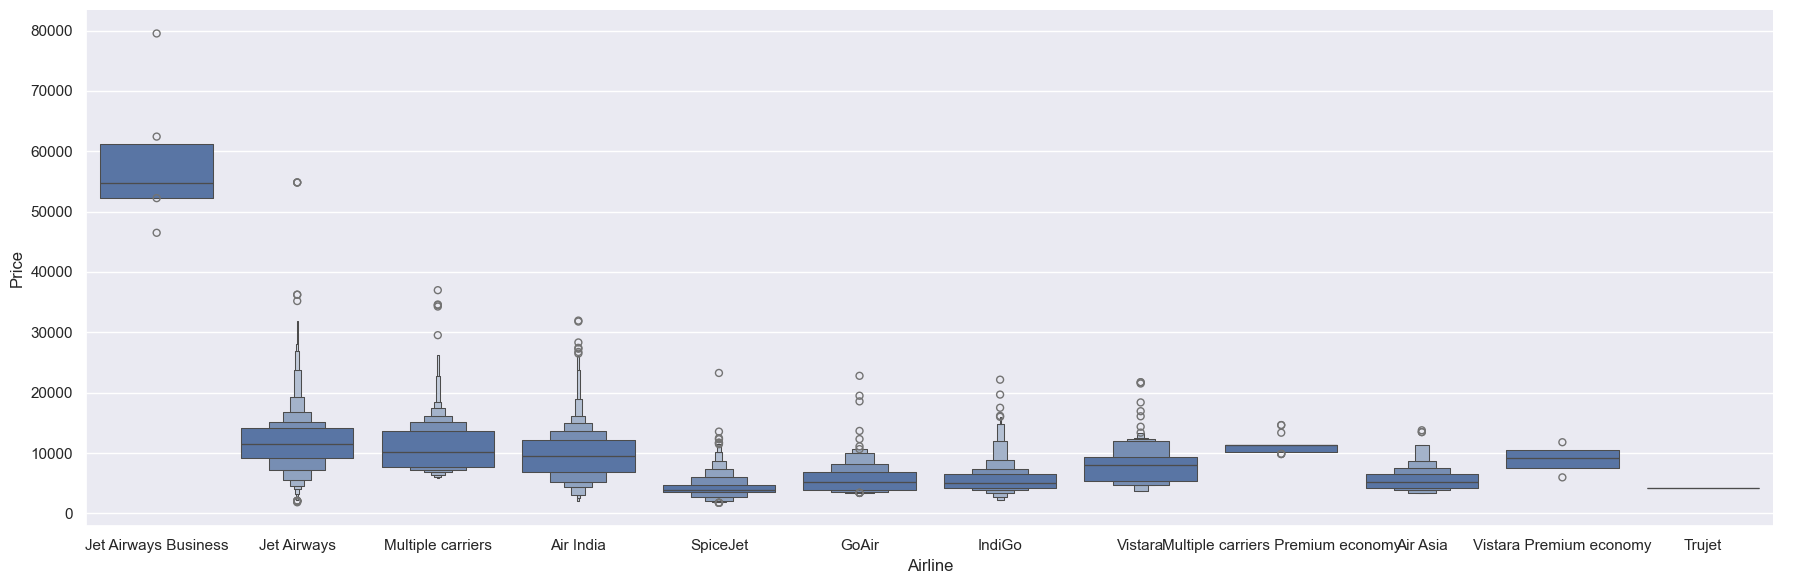

In [376]:
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending=False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [377]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [378]:
train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [379]:
train_data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

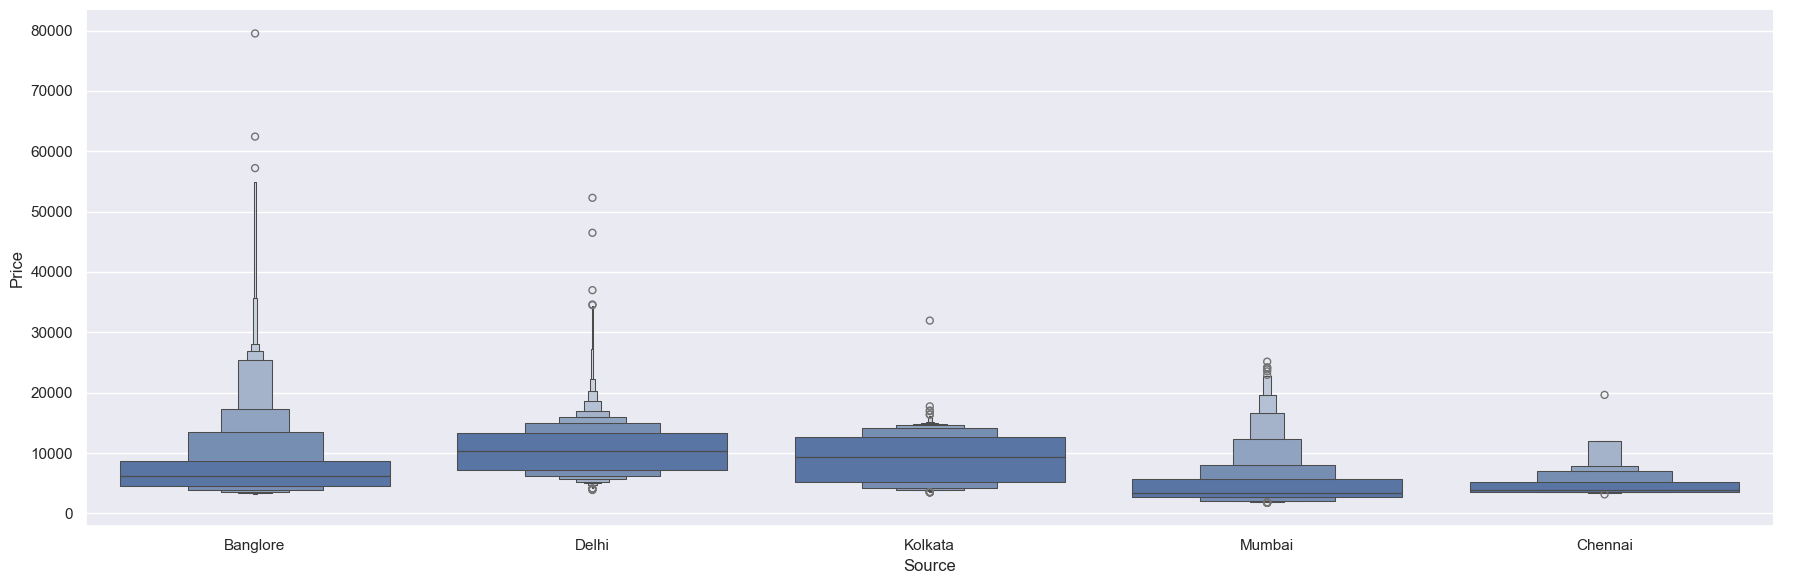

In [380]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending=False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [381]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [382]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [383]:
train_data.drop(["Route","Additional_Info"], axis=1, inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,4,45,21,35


In [384]:
train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [385]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\2119587388.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)


In [386]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4,45,21,35


In [387]:
print(data_train["Total_Stops"].dtype)

object


In [388]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [389]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,2,50,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,7,25,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,19,0,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,5,25,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,4,45,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [390]:
data_train.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,2,50,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,7,25,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,19,0,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,5,25,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,4,45,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [391]:
print(data_train["Total_Stops"].dtype)

int64


# Test Set

In [392]:
test_data = pd.read_excel(r"Test_set.xlsx")

In [393]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [394]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\1846350894.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\1846350894.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\1846350894.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hou

In [395]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,12,5,6,20,10,20,4,0,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,21,5,19,15,19,0,23,45,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,21,5,8,0,21,0,13,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,24,6,23,55,2,45,2,50,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


# Feature Selection

In [396]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'duration_hours', 'duration_mins', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [397]:
X = data_train.loc[
:, [
    'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'duration_hours', 'duration_mins', 'Arrival_hour',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'
]
]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,2,50,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,1,5,5,50,7,25,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,9,6,9,25,19,0,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,12,5,18,5,5,25,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,1,3,16,50,4,45,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [398]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [399]:
data_train.dtypes

Total_Stops                                  int64
Price                                        int64
Journey_day                                  int32
Journey_month                                int32
Dep_hour                                     int32
Dep_min                                      int32
duration_hours                               int64
duration_mins                                int64
Arrival_hour                                 int32
Arrival_min                                  int32
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers                     bool
Airline_Multiple carriers Premium economy     bool
Airline_SpiceJet                              bool
Airline_Trujet                                bool
Airline_Vistara                

In [400]:
data_train_corr = data_train[["Total_Stops", "Price","Journey_day","Journey_month","Dep_hour","Dep_min","duration_hours","duration_mins","Arrival_hour","Arrival_min"]]
data_train_corr.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,duration_hours,duration_mins,Arrival_hour,Arrival_min
0,0,3897,24,3,22,20,2,50,1,10
1,2,7662,1,5,5,50,7,25,13,15
2,2,13882,9,6,9,25,19,0,4,25
3,1,6218,12,5,18,5,5,25,23,30
4,1,13302,1,3,16,50,4,45,21,35


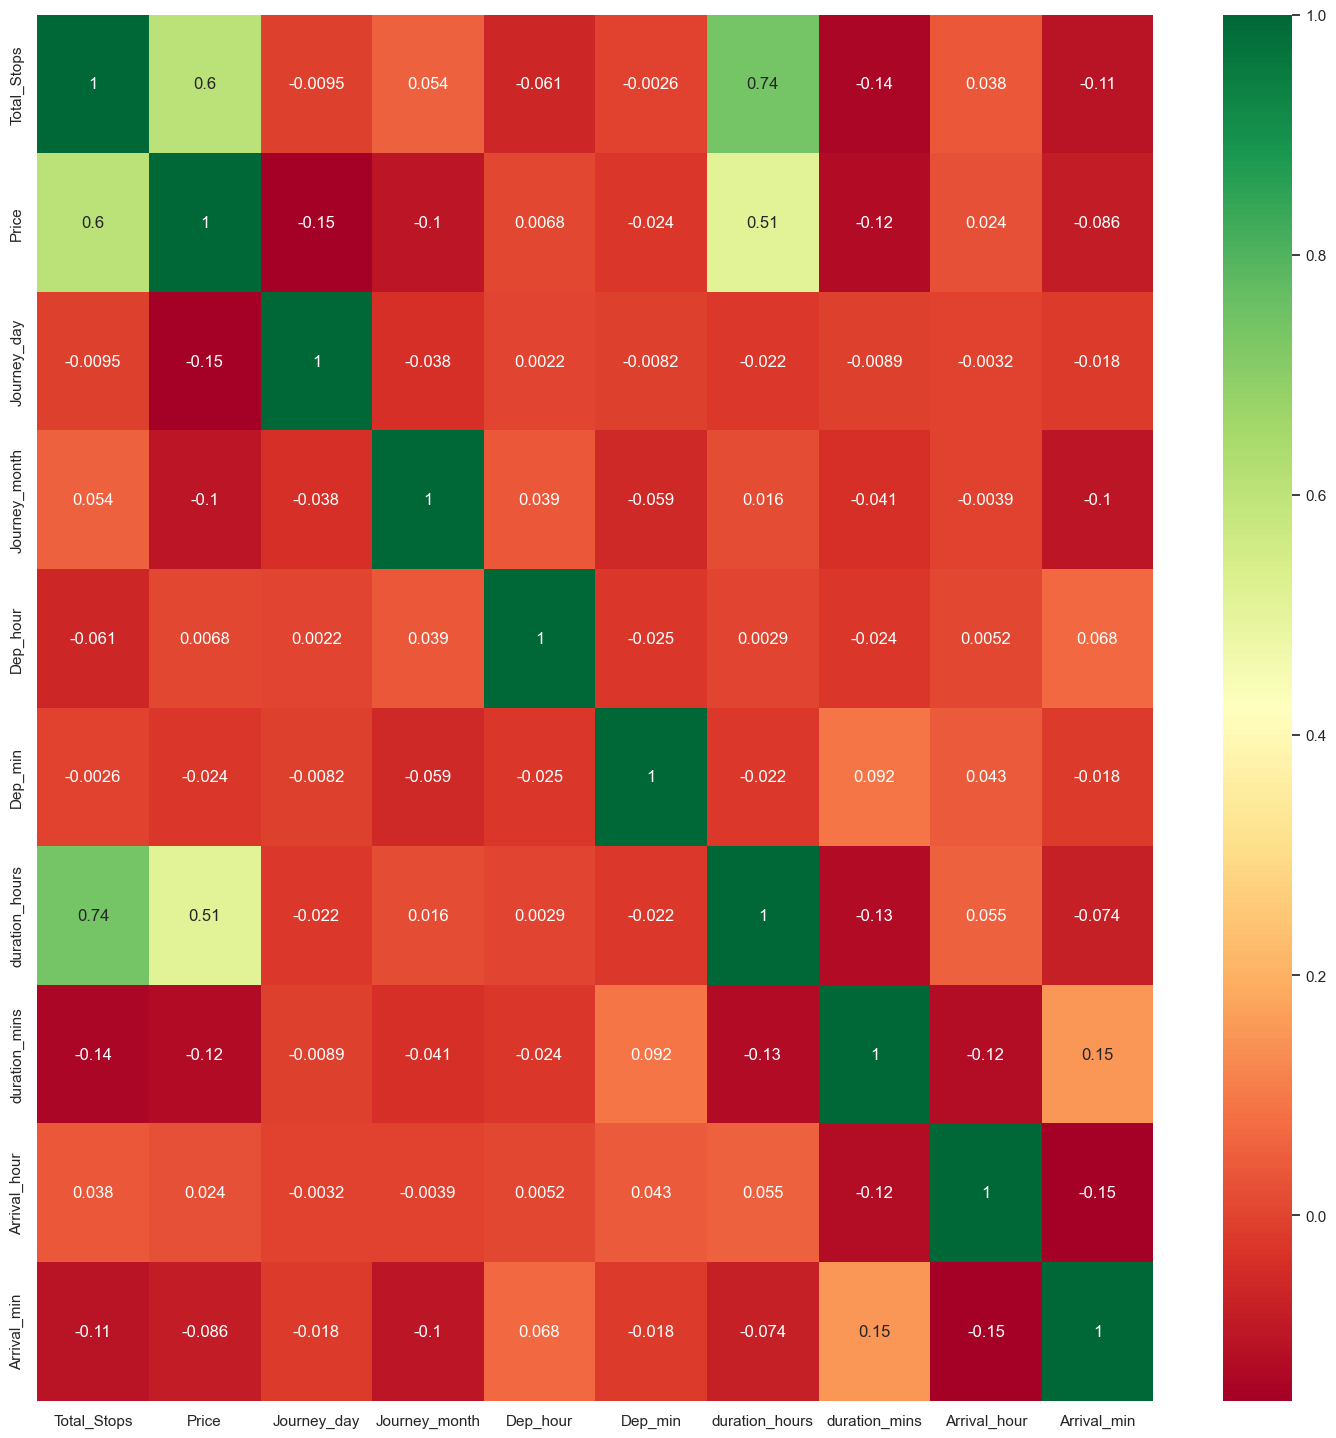

In [401]:
plt.figure(figsize = (18,18))
sns.heatmap(data_train_corr.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [402]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [404]:
print(selection.feature_importances_)

[2.42226891e-01 1.44483474e-01 5.30811674e-02 2.45906195e-02
 2.11428793e-02 1.14925184e-01 1.74539737e-02 2.73817123e-02
 1.94838804e-02 9.19356356e-03 2.24464987e-03 1.94482699e-02
 1.34362414e-01 6.70797585e-02 1.64662108e-02 8.32586869e-04
 3.40142940e-03 1.40294047e-04 5.07903601e-03 8.36889452e-05
 5.87400240e-04 8.45717963e-03 3.10926843e-03 8.04470908e-03
 1.17860042e-02 1.35695043e-02 6.02654984e-03 4.15913845e-04
 2.49017874e-02]


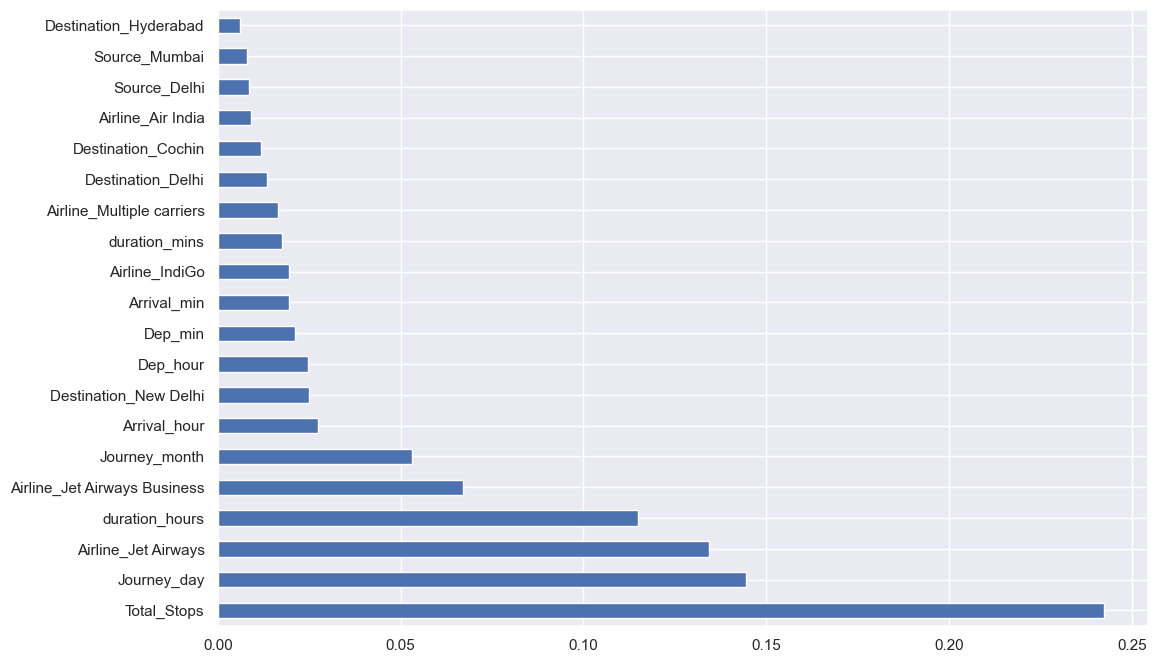

In [406]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index = X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Random Forest Algorithm

In [407]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [408]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [409]:
y_pred = reg_rf.predict(X_test)

In [410]:
reg_rf.score(X_train, y_train)

0.9531615628465202

In [411]:
reg_rf.score(X_test, y_test)

0.7976031706595549

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


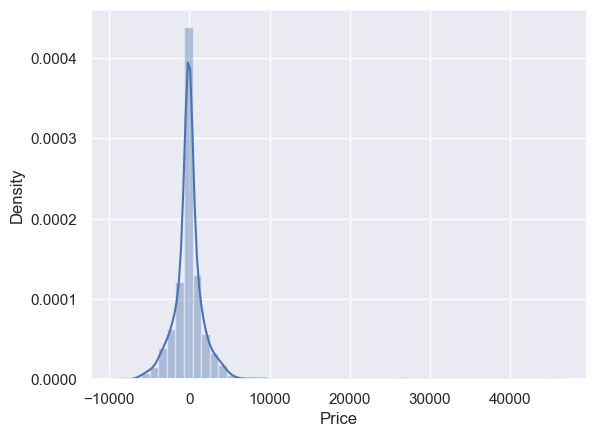

In [412]:
sns.distplot(y_test-y_pred)
plt.show()

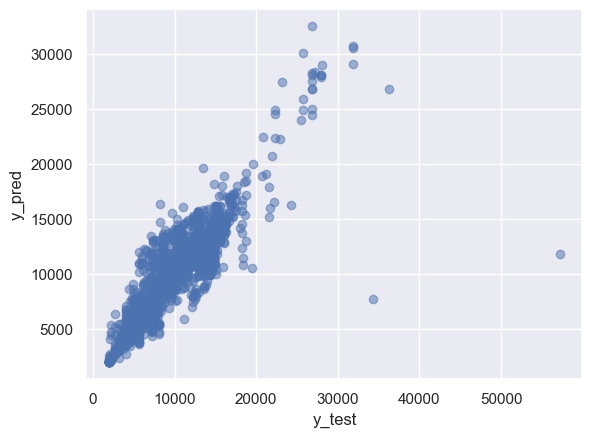

In [413]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [415]:
from sklearn import metrics

In [417]:
# Calculate MAE
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = metrics.mean_squared_error(y_test, y_pred)

# Calculate RMSE (Square root of MSE)
rmse = np.sqrt(mse)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1180.7708781933243
Mean Squared Error (MSE): 4364091.8340704385
Root Mean Squared Error (RMSE): 2089.0408885587754


In [418]:
metrics.r2_score(y_test,y_pred)

0.7976031706595549

# Hyper Parameter Tuning

In [419]:
from sklearn.model_selection import RandomizedSearchCV

In [420]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [421]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [422]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [423]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\AppData\Local\Programs\Python\Python312\L

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [424]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [425]:
prediction = rf_random.predict(X_test)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11984\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


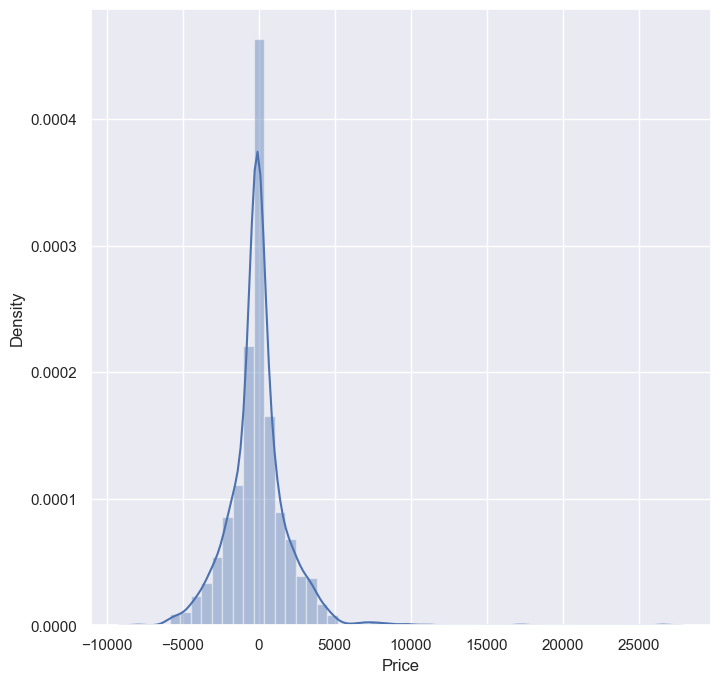

In [426]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

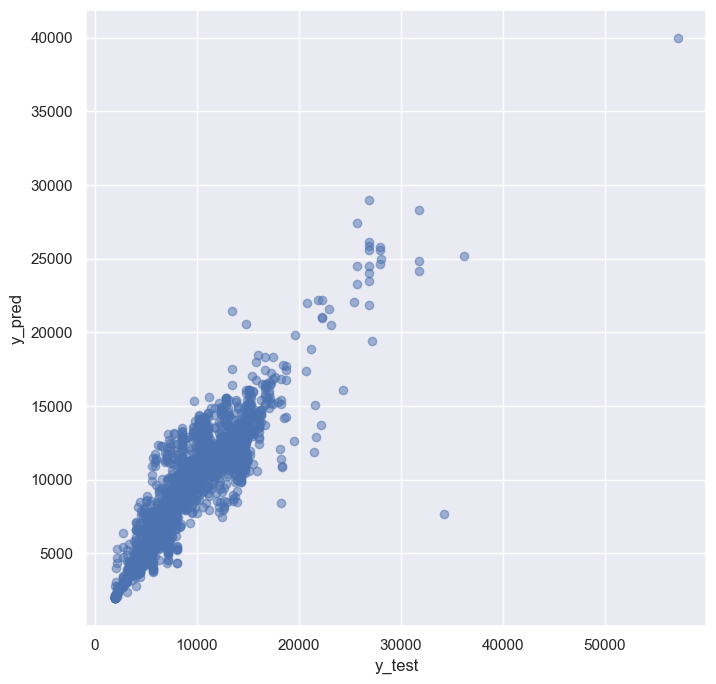

In [427]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [428]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1262.873811202634
MSE: 3868278.813443686
RMSE: 1966.7940444905985


# Save the model

In [438]:
import pickle

file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [439]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [440]:
y_prediction = forest.predict(X_test)

In [441]:
metrics.r2_score(y_test, y_prediction)

0.8205978708482915